# Udacity - CRISP-DM Project: An In-Depth Analysis of Seattle's Airbnb Market Data

### 1. BUSINESS UNDERSTANDING

The Seattle Airbnb dataset provides a wealth of information about listings, calendar availability, and user reviews. By leveraging this data, I aim to answer several key business questions that can offer strategic insights into Seattle’s Airbnb market.

#### Pricing Trends
- **Price distiribution**: What distiribution of price? what is the insights about market behavior, customer demand, and pricing strategies?
- **Seasonal Influence**: What seasonal patterns affect pricing? Can we identify the peak season for Airbnb bookings in Seattle?
- **Neighborhood Pricing**: How do prices vary across different neighborhoods? Which neighborhoods are the most expensive, and how do they compare throughout the year?
- **Property Type Impact**: In the priciest neighborhoods, how do different property types influence listing prices? What trends can we observe for the most common property types?

#### Sentiment Analysis of Reviews
- **Sentiment Classification**: How can we categorize customer reviews based on sentiment? What themes or emotions dominate the reviews?
- **Neighborhood Sentiment Mapping**: Can we associate positive and negative sentiments with specific neighborhoods? Which areas receive the highest praise, and which struggle with negative feedback?


#### Price Prediction
- **Predictive Modeling**: Can we build a model to accurately predict the price of a given listing? Which listing features—location, property type, amenities—are the strongest predictors of price?

### Why These Questions Matter
Understanding pricing trends can reveal the peak seasons and highest-demand neighborhoods, allowing Airbnb to optimize inventory and tailor marketing campaigns for maximum impact. Price prediction helps highlight the key drivers of listing price, providing insights to both Airbnb hosts and the platform itself on what factors to prioritize for maximizing profitability.


### 2. DATA UNDERSTANDING

To dive deeper into the Seattle Airbnb market, let's begin by exploring the data itself. 

The dataset is split into three key files, each offering unique insights:
- **Listings**: Contains detailed information about Airbnb properties, including location, price, property type, and more.
- **Calendar**: Tracks availability and pricing over time, allowing us to explore seasonal trends and booking patterns.
- **Reviews**: A treasure trove of user feedback, ripe for sentiment analysis and deeper insights into guest experiences.

As a first step, I will read and explore each dataset to get a better sense of the structure, key features, and potential insights they hold.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns

### CALENDAR Data Set

Let’s start by exploring the Calendar dataset. We will focus on the following aspects:

- **Number of Rows and Columns**: Determine the size of the dataset.
- **type of Columns**: Determine the type of the dataset.
- **Missing Values**: Identify columns with missing values and those with complete data.
- **Dataset Description**: Generate a summary to understand the features and statistics of each column.
- **Histogram of Price**: Plot Histogram of Price and its itrpretation


In [2]:
# Read in the calendar data set
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
print("Number of rows and columns:", df_calendar.shape)


Number of rows and columns: (1393570, 4)


In [4]:
print("Column data types:\n", df_calendar.dtypes)

Column data types:
 listing_id     int64
date          object
available     object
price         object
dtype: object


In [5]:
# it is not clear by object

In [6]:
type(df_calendar['price'][0])

str

In [7]:
type(df_calendar['available'][0])

str

In [8]:
type(df_calendar['date'][0])

str

In [9]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [14]:
def missing_percentage(dataframe, column):
    """
    Calculate the percentage of missing values in a specified column of a given dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column (str): The name of the column to check for missing values.

    Returns:
    float: The percentage of missing values in the specified column.
    
    Raises:
    KeyError: If the specified column is not found in the dataframe.
    """
    try:
        missing_count = dataframe[column].isnull().sum()
        total_count = len(dataframe[column])
        return (missing_count / total_count) * 100
    except KeyError:
        raise KeyError(f"The column '{column}' does not exist in the dataframe.")


In [15]:
missing_percentage(df_calendar, 'price')


32.938998399793334

In [16]:
# Describe the dataset to see features about each column
print("Dataset description:\n", df_calendar.describe(include='all'))

Dataset description:
           listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-01-04         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


### Conversion of 'Price' Column

#### Issue Identified
- The 'price' column in the dataset contained values formatted as strings (e.g., '$85.00'). This string format included dollar signs and decimal points, which prevented numerical operations and accurate descriptive statistics.

#### Action Taken
- We converted the 'price' column from string format to numerical values. This involved:
  - Removing the dollar sign and any commas from the string values.
  - Converting the cleaned string values to floating-point numbers.


# Verify the changes
print("Data types after conversion:\n", df_calendar.dtypes)


In [17]:
# Drop rows with any NaN values
df_calendar_clean = df_calendar.dropna()

# Describe the cleaned dataset to see features about each column
print("Dataset description after dropping NaNs:\n", df_calendar_clean.describe(include='all'))


Dataset description after dropping NaNs:
           listing_id        date available    price
count   9.345420e+05      934542    934542   934542
unique           NaN         365         1      669
top              NaN  2017-01-01         t  $150.00
freq             NaN        2922    934542    36646
mean    5.305517e+06         NaN       NaN      NaN
std     2.974821e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     2.875975e+06         NaN       NaN      NaN
50%     5.615620e+06         NaN       NaN      NaN
75%     7.873345e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


In [18]:
# Remove the dollar sign and convert the 'price' column to numerical values
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
df_calendar



,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [19]:
df_calendar['price'][0]

85.0

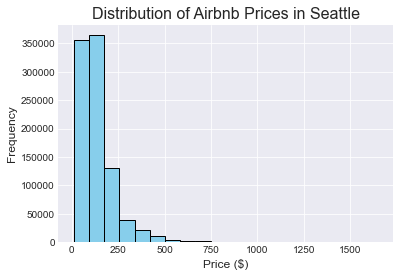

Bin 1: $10.00 - $92.00, Count: 356036.0
Bin 2: $92.00 - $174.00, Count: 364102.0
Bin 3: $174.00 - $256.00, Count: 130064.0
Bin 4: $256.00 - $338.00, Count: 38759.0
Bin 5: $338.00 - $420.00, Count: 21803.0
Bin 6: $420.00 - $502.00, Count: 11820.0
Bin 7: $502.00 - $584.00, Count: 3513.0
Bin 8: $584.00 - $666.00, Count: 2668.0
Bin 9: $666.00 - $748.00, Count: 2767.0
Bin 10: $748.00 - $830.00, Count: 1087.0
Bin 11: $830.00 - $912.00, Count: 622.0
Bin 12: $912.00 - $994.00, Count: 532.0
Bin 13: $994.00 - $1076.00, Count: 442.0
Bin 14: $1076.00 - $1158.00, Count: 120.0
Bin 15: $1158.00 - $1240.00, Count: 71.0
Bin 16: $1240.00 - $1322.00, Count: 17.0
Bin 17: $1322.00 - $1404.00, Count: 0.0
Bin 18: $1404.00 - $1486.00, Count: 28.0
Bin 19: $1486.00 - $1568.00, Count: 0.0
Bin 20: $1568.00 - $1650.00, Count: 91.0


In [20]:
import matplotlib.pyplot as plt

# Set a nice style for the plot
plt.style.use('seaborn-darkgrid')

# Plot the histogram for the 'price' column and get the counts
counts, bins, patches = plt.hist(df_calendar['price'], bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Airbnb Prices in Seattle', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.savefig('histprice.jpg', format='jpg')
plt.savefig('histprice.eps', format='eps')

# Show the plot
plt.show()

# Print bin counts for interpretation
for i in range(len(bins)-1):
    print(f"Bin {i+1}: ${bins[i]:.2f} - ${bins[i+1]:.2f}, Count: {counts[i]}")


### FINDINGS

#### Interpretation of Airbnb Price Distribution in Seattle

### Interpretation of the Airbnb Price Distribution

From the distribution of Airbnb prices in Seattle, we observe the following key trends:

1. **Majority of Listings in Lower Price Ranges**:
   - Most listings are concentrated in the lower price ranges. Specifically, listings priced between **$10 and $174** make up the bulk of the data, indicating that Seattle offers many budget-friendly and mid-range Airbnb options. This price range captures over **720,000** listings in total, reflecting a significant preference for affordable accommodation.

2. **Gradual Decline in Listings as Prices Increase**:
   - As prices rise beyond **$174**, the number of available listings drops sharply. Listings priced between **$174 and $338** represent a smaller, yet notable portion of the market. Beyond this range, the number of listings continues to decline steadily.

3. **Limited Listings in the High-End Market**:
   - There are relatively few high-end listings priced above **$500**. These luxury accommodations represent only a small fraction of the total Airbnb market in Seattle. For instance, listings above **$1,000** are rare, and those above **$1,500** are nearly non-existent.

#### Summary:
- The Airbnb market in Seattle is primarily composed of affordable to mid-range listings, with a sharp drop in availability as prices rise into the higher and luxury segments.


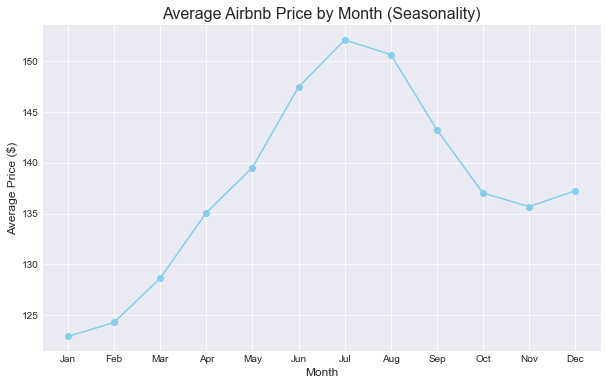

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date column is in datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Extract month from the date
df_calendar['month'] = df_calendar['date'].dt.month

# Clean the 'price' column by removing $ and converting to float
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by month and calculate average price across all years
monthly_avg_price = df_calendar.groupby('month')['price'].mean()

# Plot the monthly average price to visualize seasonality
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='line', marker='o', color='skyblue')

# Customize the plot
plt.title('Average Airbnb Price by Month (Seasonality)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

plt.savefig('sprice.jpg', format='jpg')
plt.savefig('sprice.eps', format='eps')

# Show the plot
plt.show()


### FINDINGS

Based on the analysis, it is evident that the peak months for Airbnb prices in Seattle are from **June through August**, with **July** having the highest average price. This aligns with the fact that summer offers the best weather in Seattle, making it a popular travel destination during these months.

Additionally, the year begins with lower prices, with **January** showing the lowest average. Prices gradually rise in the spring, peaking again during the **holiday season** around **November and December**, likely due to increased travel and holiday demand.


### LISTINGS Data Set

Next, let's delve into the Listings data set. Our exploration will cover the following aspects:

- **Number of Rows and Columns**: Determine the size of the dataset.
- **Missing Values**: Identify columns with missing values as well as those with complete data.
- **Dataset Description**: Generate a summary to understand the features and statistics of each column.
- **Categorical Features**: Examine and explore the categorical features present in the dataset.

In [22]:
# Read in the listings data set
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [23]:
# Read in the listings data set
df_listings = pd.read_csv('listings.csv')

# List the columns in the data set
df_listings.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [24]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_listings.shape)
# Assess null values
print(df_listings.isnull().sum())

Number of rows and columns:  (3818, 92)
id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64


In [25]:
# Describe
print(df_listings.describe(include='all'))

                  id                          listing_url     scrape_id  \
count   3.818000e+03                                 3818  3.818000e+03   
unique           NaN                                 3818           NaN   
top              NaN  https://www.airbnb.com/rooms/241032           NaN   
freq             NaN                                    1           NaN   
mean    5.550111e+06                                  NaN  2.016010e+13   
std     2.962660e+06                                  NaN  0.000000e+00   
min     3.335000e+03                                  NaN  2.016010e+13   
25%     3.258256e+06                                  NaN  2.016010e+13   
50%     6.118244e+06                                  NaN  2.016010e+13   
75%     8.035127e+06                                  NaN  2.016010e+13   
max     1.034016e+07                                  NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3818   
uniqu

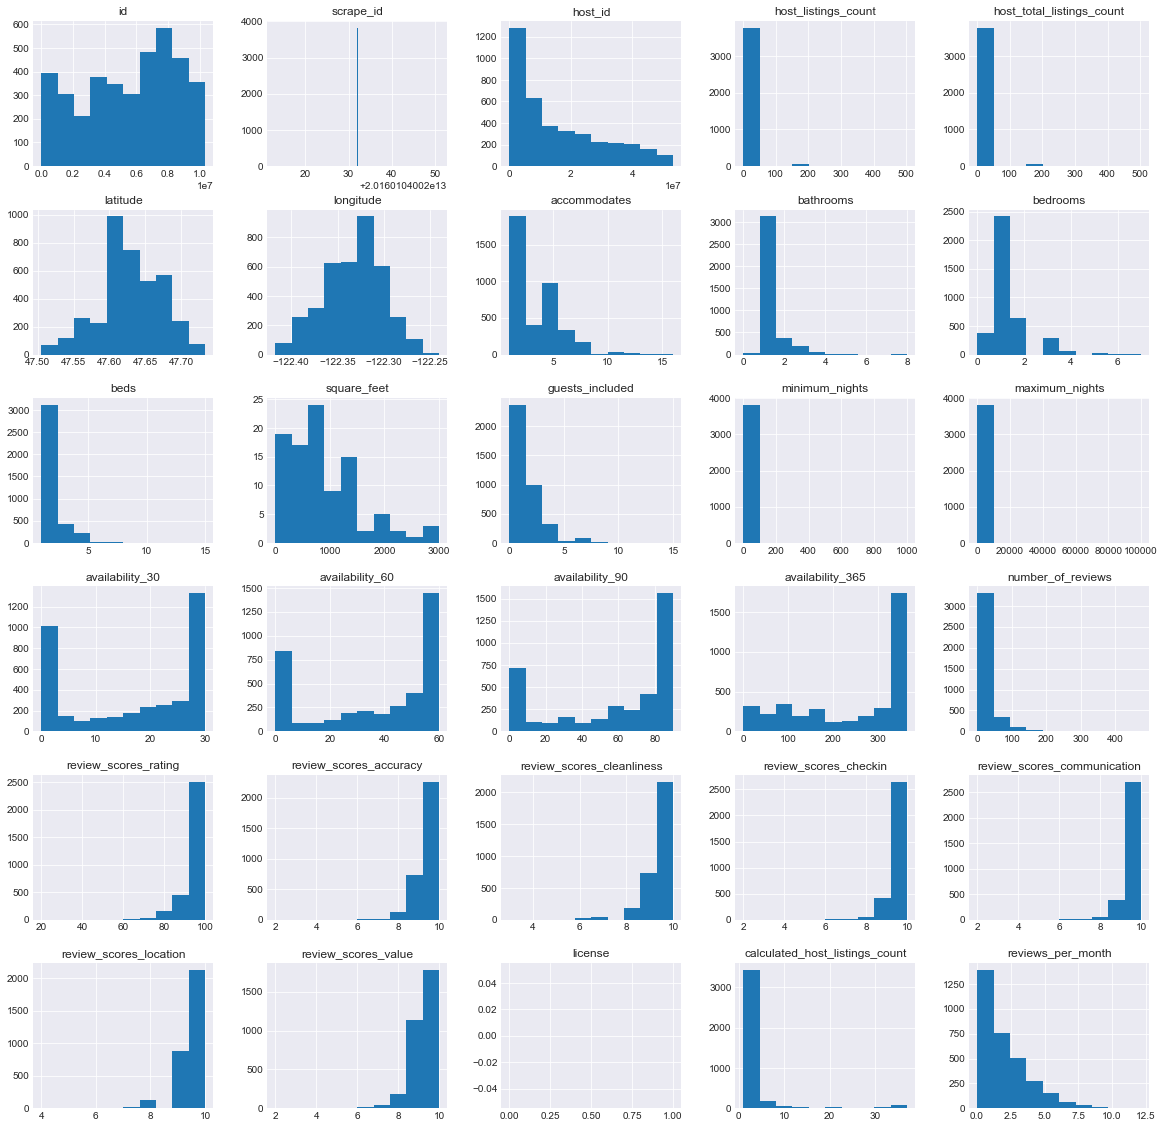

In [26]:

# plotting the histogram of the features
df_listings.hist(figsize=(20,20));

# Host Analysis

In [27]:
# Count the number of listings in each host neighborhood
neighborhood_counts = df_listings['host_neighbourhood'].value_counts()
print("Number of Listings by Host Neighborhood:\n", neighborhood_counts)




Number of Listings by Host Neighborhood:
 Capitol Hill          405
Belltown              254
Ballard               210
Minor                 191
Queen Anne            189
                     ... 
Northwest District      1
Beverly Hills           1
Long Beach              1
Baldwin Hills           1
East Village            1
Name: host_neighbourhood, Length: 102, dtype: int64


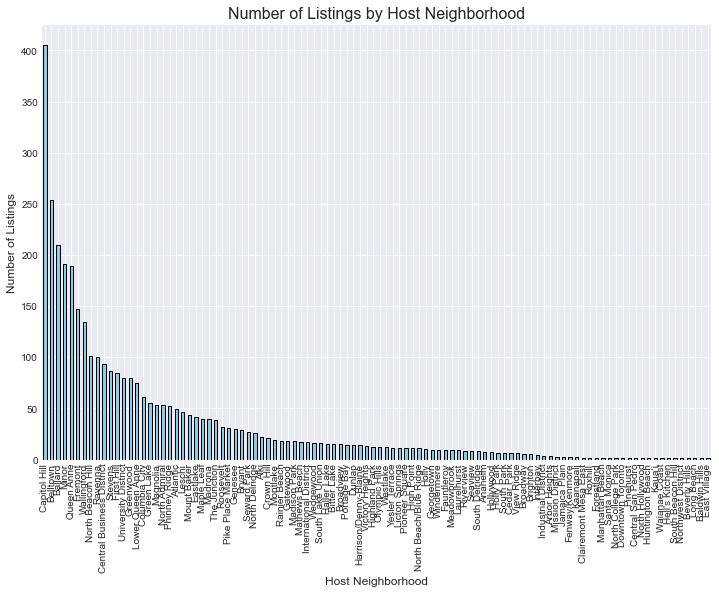

In [28]:
import matplotlib.pyplot as plt

# Set a nice style for the plot
plt.style.use('seaborn-darkgrid')

# Plot the number of listings by host neighborhood
plt.figure(figsize=(12, 8))
neighborhood_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Listings by Host Neighborhood', fontsize=16)
plt.xlabel('Host Neighborhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=90)
plt.show()


### Findings: Number of Listings by Host Neighborhood

- **Capitol Hill**: Highest with **405** listings.
- **Belltown**: **254** listings, also a major area.
- **Ballard** and **Minor**: **210** and **191** listings, respectively.
- **Queen Anne**: **189** listings.

- **Northwest District**, **Beverly Hills**, **Long Beach**, **Baldwin Hills**, **East Village**: Each has only **1** listing.


### REVIEWS Data Set

Let's dive into the Reviews data set and focus on the following aspects:

- **Dataset Size**: Check the number of rows and columns.
- **Missing Values**: Identify which columns have missing data and which are complete.
- **Column Features**: Generate descriptive statistics to understand the key characteristics of each column.


In [29]:
# Read in the reviews data set
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [30]:
# Print rows and columns in reviews data set
print("Number of rows and columns: ", df_reviews.shape)
# Assess null values
print(df_reviews.isnull().sum())
# Describe
print(df_reviews.describe(include='all'))

Number of rows and columns:  (84849, 6)
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN 